# ML-Based Assessment on the Global Cyber Threat Landscape: 

Following week 7, dive into descriptive statistics and data visualization (Matplotlib, Seaborn). Introduce the core theory of linear regression (Simple and Multiple) and use scikit-learn to build your first model.

Data obtained from [this study](https://www.mdpi.com/2078-2489/15/4/199).

The target variables are On-demand Scan, and Local infection while the other variables are the features.

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display
from IPython.display import clear_output
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

### Data Loading and Initial Checks

In [2]:
# Load data
df = pd.read_csv('cyber_data.csv')
df

,AttackDate,Country,Spam,Ransomware,Local Infection,Exploit,Malicious Mail,Network Attack,On Demand Scan,Web Threat,Rank Spam,Rank Ransomware,Rank Local Infection,Rank Exploit,Rank Malicious Mail,Rank Network Attack,Rank On Demand Scan,Rank Web Threat
0,11/10/2022 0:00,Arab Republic of Egypt,0.00090,0.00013,0.01353,0.00013,0.00287,0.01007,0.01148,0.01708,68,47,85,176,34,11,78,53
1,11/10/2022 0:00,Argentine Republic,0.00601,0.00006,0.00575,0.00035,0.00058,0.00095,0.00482,0.00974,27,86,174,128,140,138,174,160
2,11/10/2022 0:00,Aruba,NaN,NaN,0.01384,NaN,0.00092,NaN,0.00830,0.00554,162,143,82,186,104,187,119,190
3,11/10/2022 0:00,Bailiwick of Guernsey,NaN,NaN,0.00546,0.00273,NaN,0.00091,0.00546,0.01001,162,143,179,1,186,141,164,159
4,11/10/2022 0:00,Bailiwick of Jersey,0.00003,NaN,0.00774,0.00101,0.00067,NaN,0.00707,0.01145,138,143,150,31,133,187,137,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77618,11/12/2023 0:00,United Arab Emirates,0.00064,0.00009,0.00901,0.00057,0.00198,0.00149,0.00892,0.01274,86,37,100,43,2,40,42,87
77619,11/12/2023 0:00,United Kingdom of Great Britain and Northern I...,0.01292,0.00003,0.00428,0.00084,0.00021,0.00045,0.00382,0.01205,12,89,173,14,97,139,171,100
77620,11/12/2023 0:00,United Mexican States,0.00500,0.00004,0.00870,0.00019,0.00035,0.00106,0.00772,0.00834,34,77,106,122,65,68,74,152
77621,11/12/2023 0:00,United Republic of Tanzania,0.00030,0.00002,0.01201,0.00031,0.00028,0.00091,0.00717,0.01145,101,116,54,83,77,83,92,114


In [3]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Spam,62982.0,0.006094,0.024337,0.00001,0.00009,0.00059,0.003530,0.30249
Ransomware,52144.0,0.000130,0.000186,0.00001,0.00004,0.00007,0.000140,0.00918
Local Infection,74469.0,0.013350,0.008415,0.00024,0.00715,0.01079,0.017660,0.04937
Exploit,64264.0,0.000469,0.000368,0.00001,0.00021,0.00039,0.000620,0.00466
Malicious Mail,69184.0,0.001292,0.001606,0.00001,0.00030,0.00073,0.001690,0.04322
Network Attack,71532.0,0.002222,0.003034,0.00002,0.00070,0.00129,0.002350,0.05826
On Demand Scan,74231.0,0.009756,0.006080,0.00024,0.00521,0.00814,0.012870,0.12488
Web Threat,73892.0,0.013006,0.004943,0.00024,0.00970,0.01257,0.015973,0.04863
Rank Spam,77623.0,94.532986,52.672716,1.00000,48.00000,98.00000,144.000000,186.00000
Rank Ransomware,77623.0,84.001649,48.976540,1.00000,41.00000,88.00000,131.000000,158.00000


In [4]:
#check total count and nulls counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AttackDate            77623 non-null  object 
 1   Country               77623 non-null  object 
 2   Spam                  62982 non-null  float64
 3   Ransomware            52144 non-null  float64
 4   Local Infection       74469 non-null  float64
 5   Exploit               64264 non-null  float64
 6   Malicious Mail        69184 non-null  float64
 7   Network Attack        71532 non-null  float64
 8   On Demand Scan        74231 non-null  float64
 9   Web Threat            73892 non-null  float64
 10  Rank Spam             77623 non-null  int64  
 11  Rank Ransomware       77623 non-null  int64  
 12  Rank Local Infection  77623 non-null  int64  
 13  Rank Exploit          77623 non-null  int64  
 14  Rank Malicious Mail   77623 non-null  int64  
 15  Rank Network Attack

It can be seen above that there are some, if not, a lot of nulls in the following fields:
- Spam         
- Ransomware   
- Local Infection      
- Exploit   
- Malicious Mail     
- Network Attack         
- On Demand Scan       
- Web Threat           

We can also see that the fields names need to be fixed to ensure that there wouldn't be any issues down the line.

In [5]:
# Check if the counts per category to check if encoding needs to be done.
"""We know from the head() that we can encode Country but we need to check other columns if these can be encoded too."""
[display(df[i].value_counts()) for i in df.columns if df[i].dtype not in ('int64','datetime64[ns]')]

AttackDate
14/10/2023 0:00    205
11/12/2022 0:00    205
21/10/2022 0:00    205
14/08/2023 0:00    204
13/08/2023 0:00    204
                  ... 
18/07/2023 0:00    193
11/11/2023 0:00    193
01/08/2023 0:00    193
16/09/2023 0:00    192
29/07/2023 0:00    185
Name: count, Length: 392, dtype: int64

Country
Arab Republic of Egypt                   392
Argentine Republic                       392
Bailiwick of Jersey                      392
Belize                                   392
Barbados                                 392
                                        ... 
Virgin Islands of the United States        4
State of Eritrea                           3
Federated States of Micronesia             2
Antarctica                                 2
Democratic People's Republic of Korea      2
Name: count, Length: 225, dtype: int64

Spam
0.00001    4698
0.00002    2729
0.00003    2046
0.00004    1660
0.00005    1359
           ... 
0.04840       1
0.17932       1
0.08137       1
0.19277       1
0.03432       1
Name: count, Length: 4139, dtype: int64

Ransomware
0.00003    5973
0.00004    4696
0.00002    4550
0.00006    3966
0.00005    3925
           ... 
0.00161       1
0.00313       1
0.00163       1
0.00184       1
0.00643       1
Name: count, Length: 161, dtype: int64

Local Infection
0.00771    83
0.00595    78
0.00610    77
0.00774    75
0.01006    74
           ..
0.04072     1
0.03867     1
0.04166     1
0.04133     1
0.00086     1
Name: count, Length: 4036, dtype: int64

Exploit
0.00015    1195
0.00016    1171
0.00013    1147
0.00014    1137
0.00011    1102
           ... 
0.00232       1
0.00367       1
0.00411       1
0.00363       1
0.00316       1
Name: count, Length: 332, dtype: int64

Malicious Mail
0.00006    813
0.00021    753
0.00011    748
0.00014    727
0.00009    724
          ... 
0.01366      1
0.01274      1
0.01350      1
0.00849      1
0.01143      1
Name: count, Length: 1125, dtype: int64

Network Attack
0.00055    471
0.00058    440
0.00063    404
0.00083    401
0.00060    399
          ... 
0.01836      1
0.02255      1
0.01257      1
0.02238      1
0.02410      1
Name: count, Length: 2012, dtype: int64

On Demand Scan
0.00483    99
0.00512    98
0.00391    92
0.00474    91
0.00552    91
           ..
0.03480     1
0.02911     1
0.02825     1
0.02737     1
0.02687     1
Name: count, Length: 3012, dtype: int64

Web Threat
0.01231    94
0.01247    92
0.01302    90
0.01186    88
0.01162    88
           ..
0.03065     1
0.02773     1
0.02984     1
0.02781     1
0.03428     1
Name: count, Length: 2904, dtype: int64

[None, None, None, None, None, None, None, None, None, None]

From the list above, we can see that the 'Country' variable is the only variable that we should be encoding.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AttackDate            77623 non-null  object 
 1   Country               77623 non-null  object 
 2   Spam                  62982 non-null  float64
 3   Ransomware            52144 non-null  float64
 4   Local Infection       74469 non-null  float64
 5   Exploit               64264 non-null  float64
 6   Malicious Mail        69184 non-null  float64
 7   Network Attack        71532 non-null  float64
 8   On Demand Scan        74231 non-null  float64
 9   Web Threat            73892 non-null  float64
 10  Rank Spam             77623 non-null  int64  
 11  Rank Ransomware       77623 non-null  int64  
 12  Rank Local Infection  77623 non-null  int64  
 13  Rank Exploit          77623 non-null  int64  
 14  Rank Malicious Mail   77623 non-null  int64  
 15  Rank Network Attack

### Exploratory Data Analysis

#### Univariate Analysis

##### Distributions

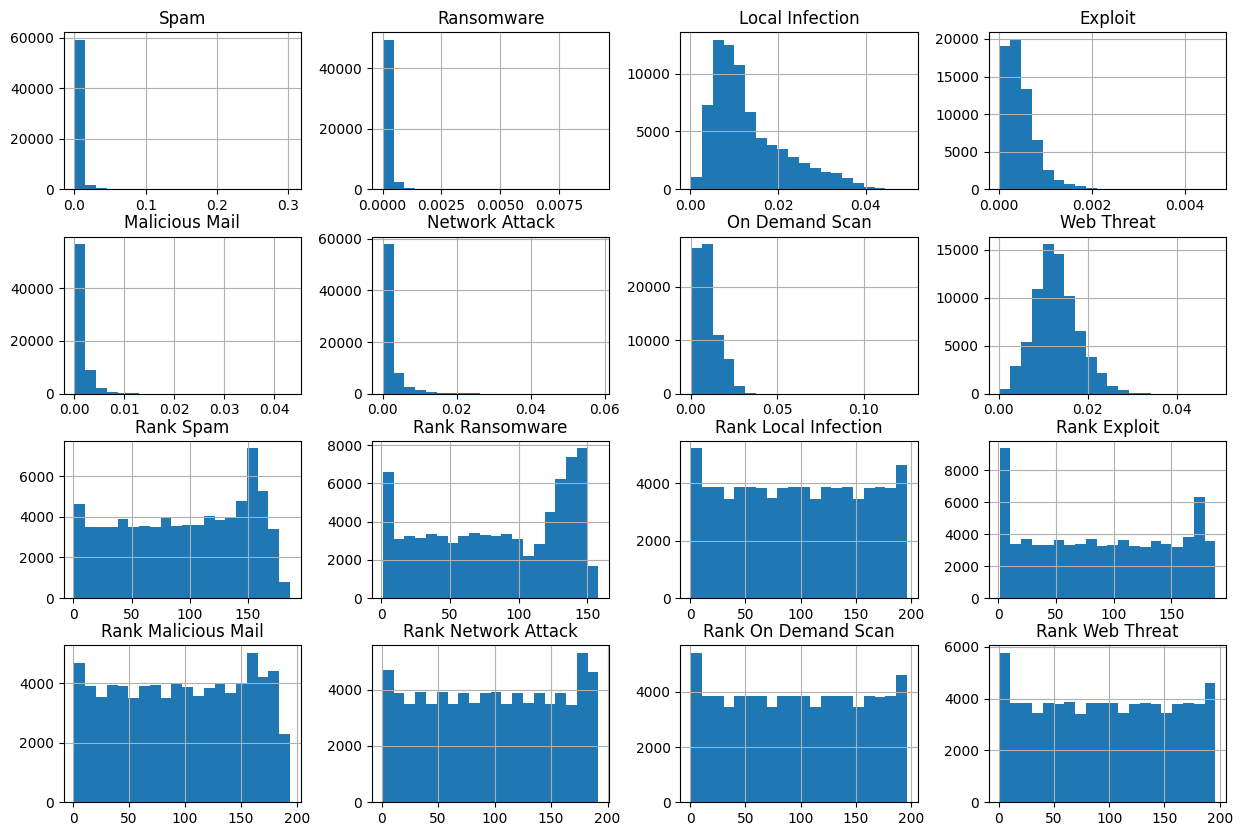

In [7]:
# Show the distributions of each feature
df.hist(bins = 20, figsize = (15,10))
plt.show()

We can see that most of the variables, not including ranking data, are skewed to the right. This information will be useful if there are nulls on said columns. We can also see that the Web Threat column appears to be somewhat Gaussian but it is still skewed to the right. That being said, if imputation is needed for these (if nulls are found), then the median should be used instead of the mean.

The distribution above shows that there is a common pattern where most of the values are non-negative and cannot go below a certain point (0 in this case). It could be hinting that the attacks occur at low frequencies while few events occur at high frequencies.

Rank data here appears to be uniform as expected from ranking data but we may need to check the frequency of the underlying events to further understand if there are reasons why these are spaced out or spread this way.

##### Outlier Checking

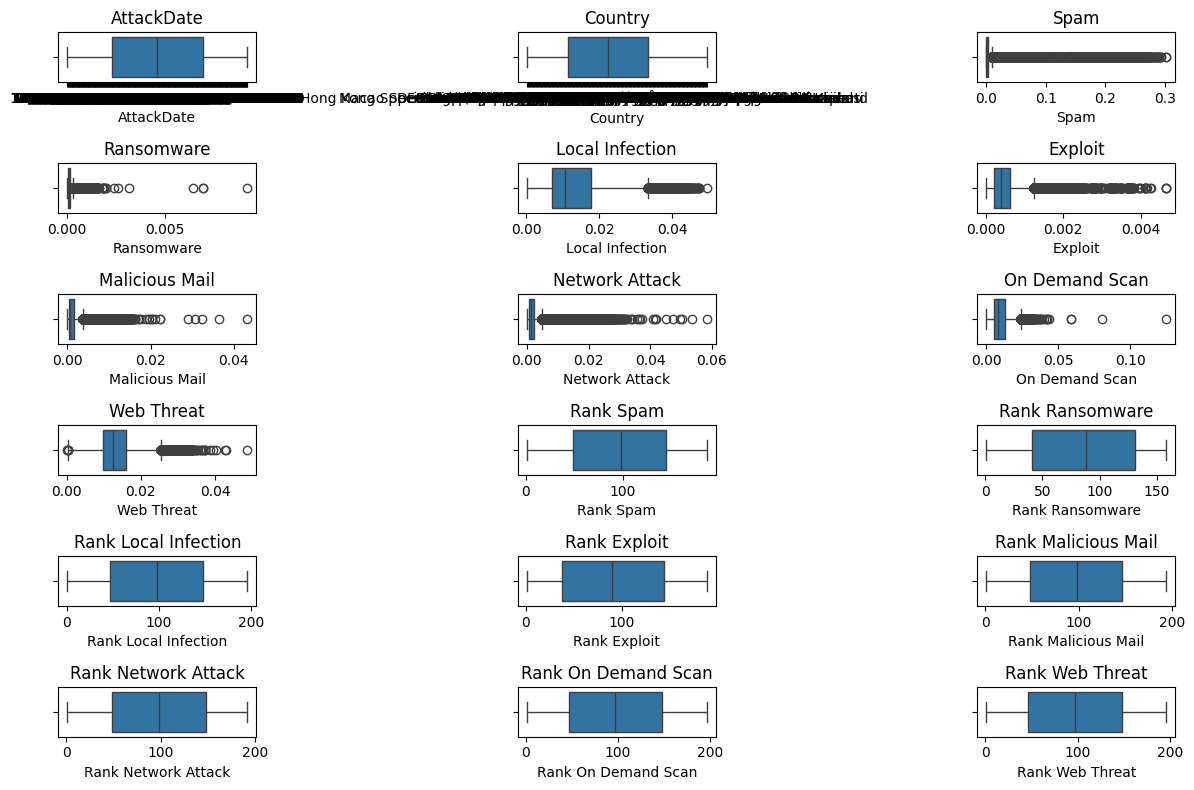

In [8]:
ncols = 3
nrows = int(np.ceil(len(df.columns) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see from the boxplots above that there appears to be outliers in Spam, Ransomware, Local Infection, Exploit, Malicious Mail, Network Attack, On Demand Scan, and Web Threat a scompared to the other variables which appear to be more stable. This is expected as the values here vary by the attack it was in. It is possible that the high rate or value is caused by a major attack event but to further understand this, we may need to check further. Once we are able to identify why there are outliers, we can then decide if we can remove the extreme outliers or to transform the data.

We can also use AttackDate and Country here to see if there is a relationship or pattern which could help identify or reveal specific major events.

#### Bivariate Analysis

##### Relationship Checking

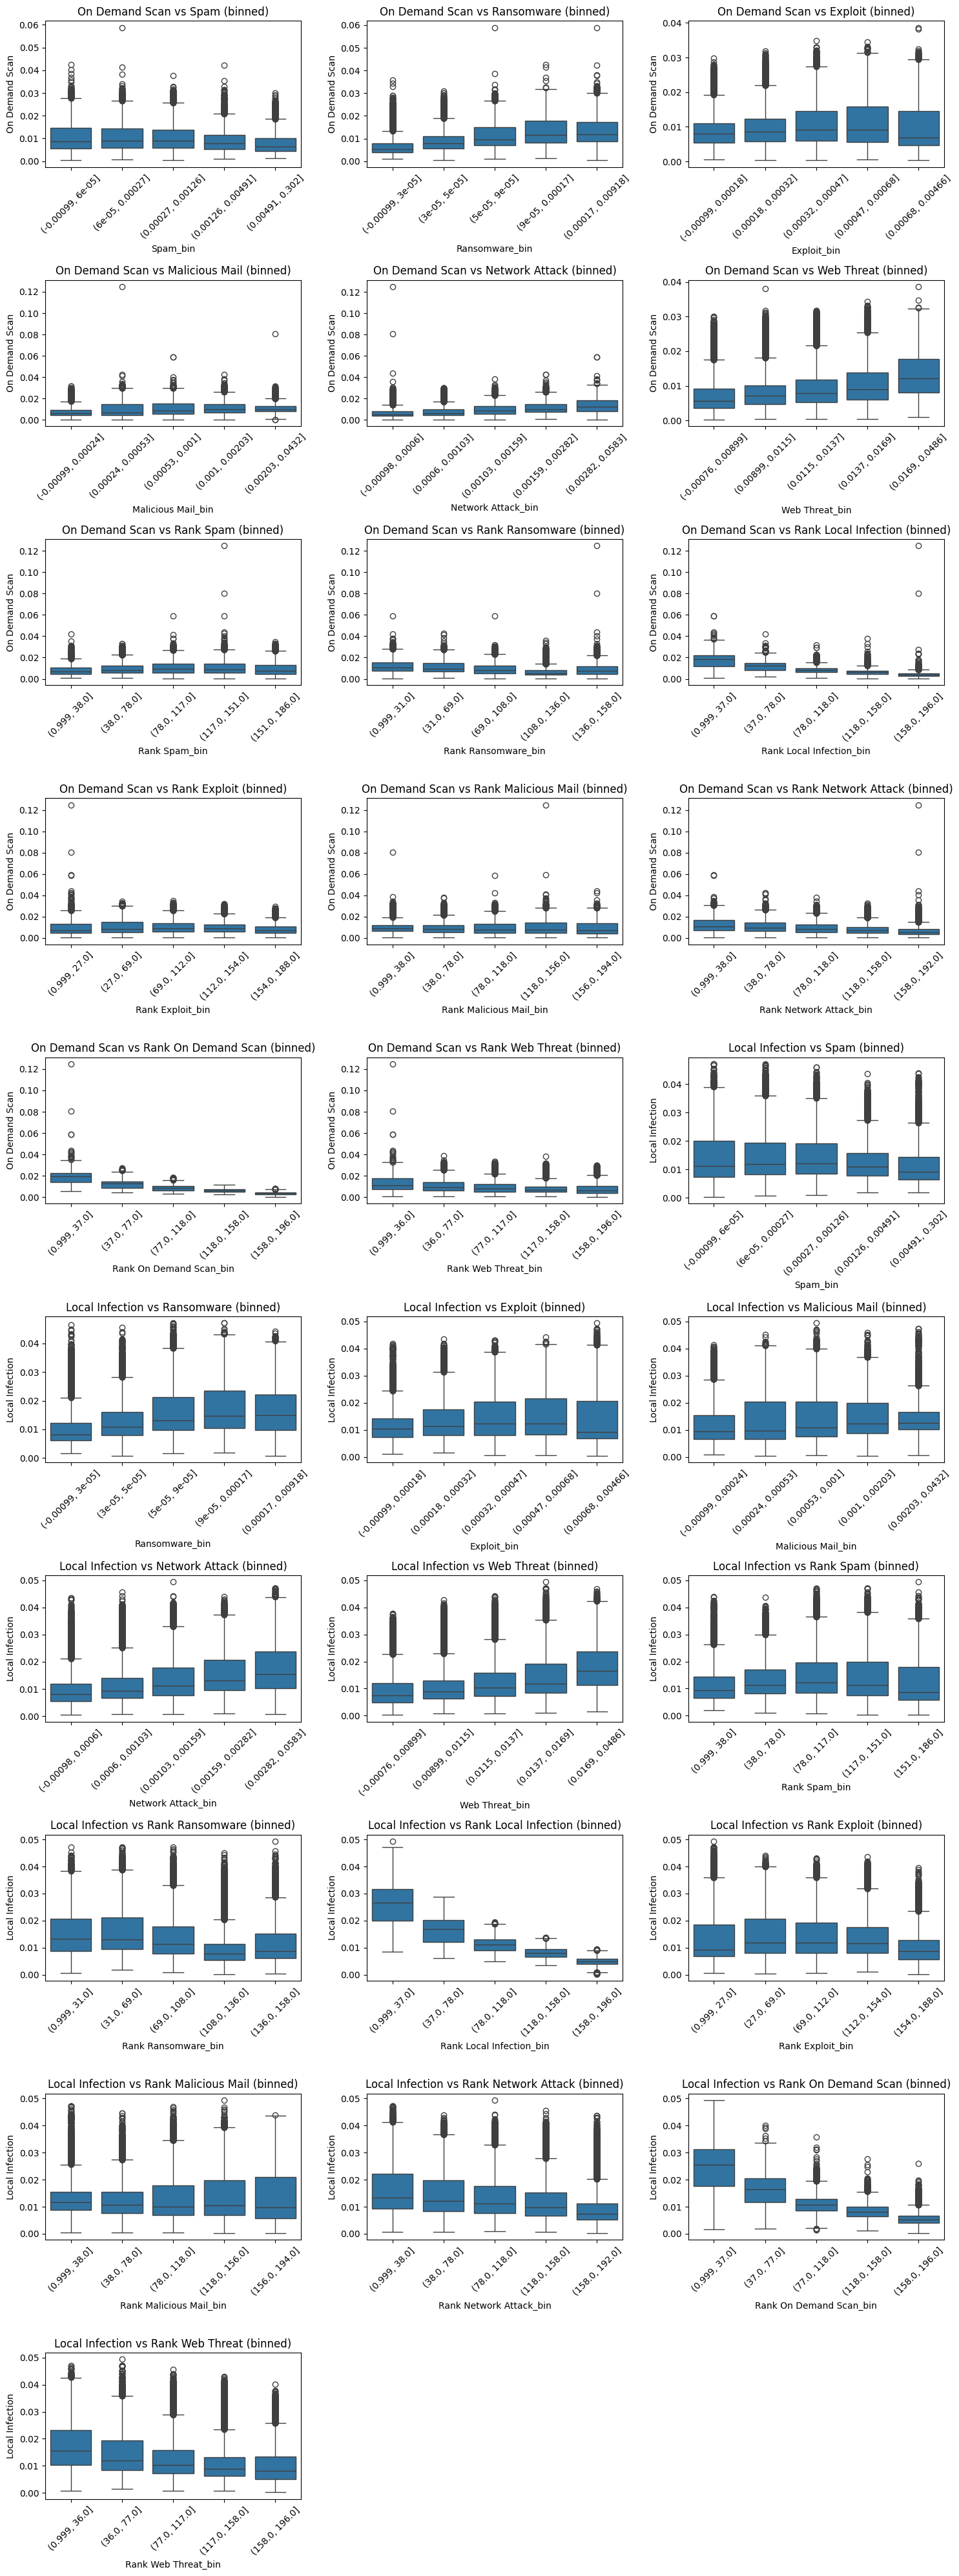

In [15]:
# Check non-linear relationships vs the two target variables
df_binned = df.copy()
exclusion_list = ['AttackDate', 'Country']
excluded_columns = ['On Demand Scan', 'Local Infection'] + exclusion_list
features = [x for x in df_binned if x not in excluded_columns]
target_vars =  list(set(excluded_columns) - set(exclusion_list))

for x in features:
    try:
        df_binned[x + "_bin"] = pd.qcut(df_binned[x], q=5, duplicates="drop")
    except (ValueError, KeyError) as e:
        print(f"Skipping column '{x}' due to an error: {e}")
        continue 

n_plots = len(target_vars) * len(features)
ncols = 3
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

plot_idx = 0
for target in target_vars:
    for x in features:
        if plot_idx < len(axes):
            sns.boxplot(
                x=df_binned[x + "_bin"], 
                y=df_binned[target], 
                ax=axes[plot_idx]
            )
            axes[plot_idx].set_title(f"{target} vs {x} (binned)")
            axes[plot_idx].tick_params(axis='x', rotation=45)
            plot_idx += 1
        else:
            break
    if plot_idx >= len(axes):
        break

for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


Looking at the boxplots, it shows an increasing or decreasing trend in the median of the target variables across the bins of the other features, which is indicative of a relationship. The fact that the boxplots don't show a perfectly straight line suggests that while there is an overall monotonic trend, the relationship might not be strictly linear.

To further understand this, we must check the correlation here. As we have seen in previous charts, the skewness and outliers shows us that we may need to use Spearman's correlation here instead of Pearson's as the latter might underestimate the true relationship. The usage of said correlation will also help detect trends even if they are not perfectly linear.

##### Correlation

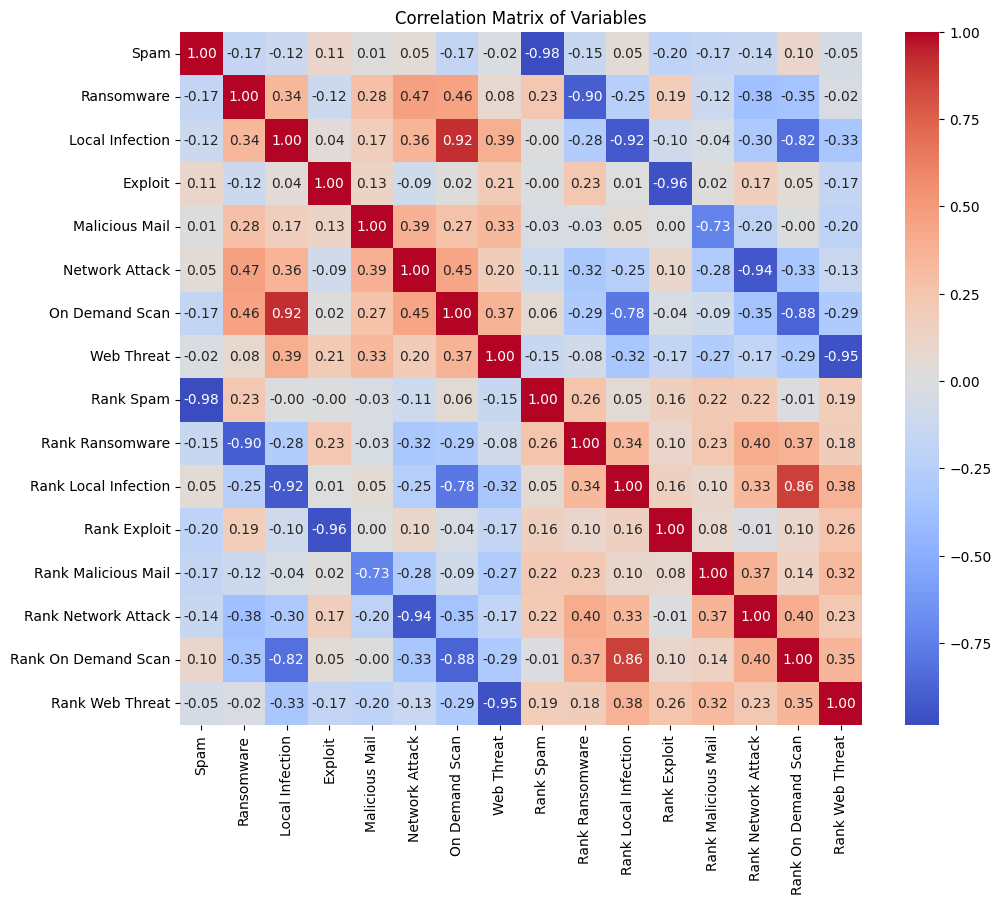

In [17]:
# Correlation Heatmap to show the relationship between the features and target variables.
# Since we are only using the nummeric data, lets create a new df and drop the non-numeric columns first.
df_corr = df.copy()
df_corr = df_corr.drop(['AttackDate', 'Country'], axis = 1)

plt.figure(figsize = (11,9))
sns.heatmap(df_corr.corr(method = 'spearman'),
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f'
            )
plt.title('Correlation Matrix of Variables')
plt.show()

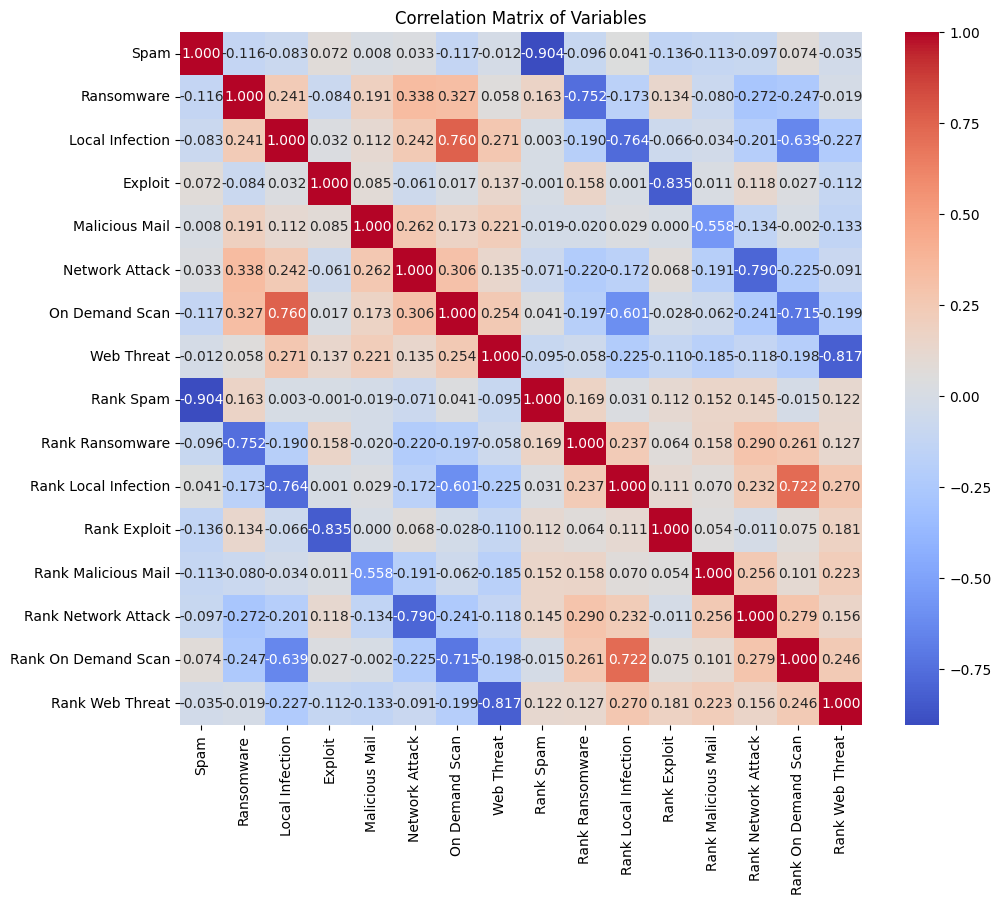

In [23]:
df_corr2 = df.copy()
df_corr2 = df_corr2.drop(['AttackDate', 'Country'], axis = 1)

plt.figure(figsize = (11,9))
sns.heatmap(df_corr2.corr(method = 'kendall'),
            annot = True,
            cmap = 'coolwarm',
            fmt = '.3f'
            )
plt.title('Correlation Matrix of Variables')
plt.show()

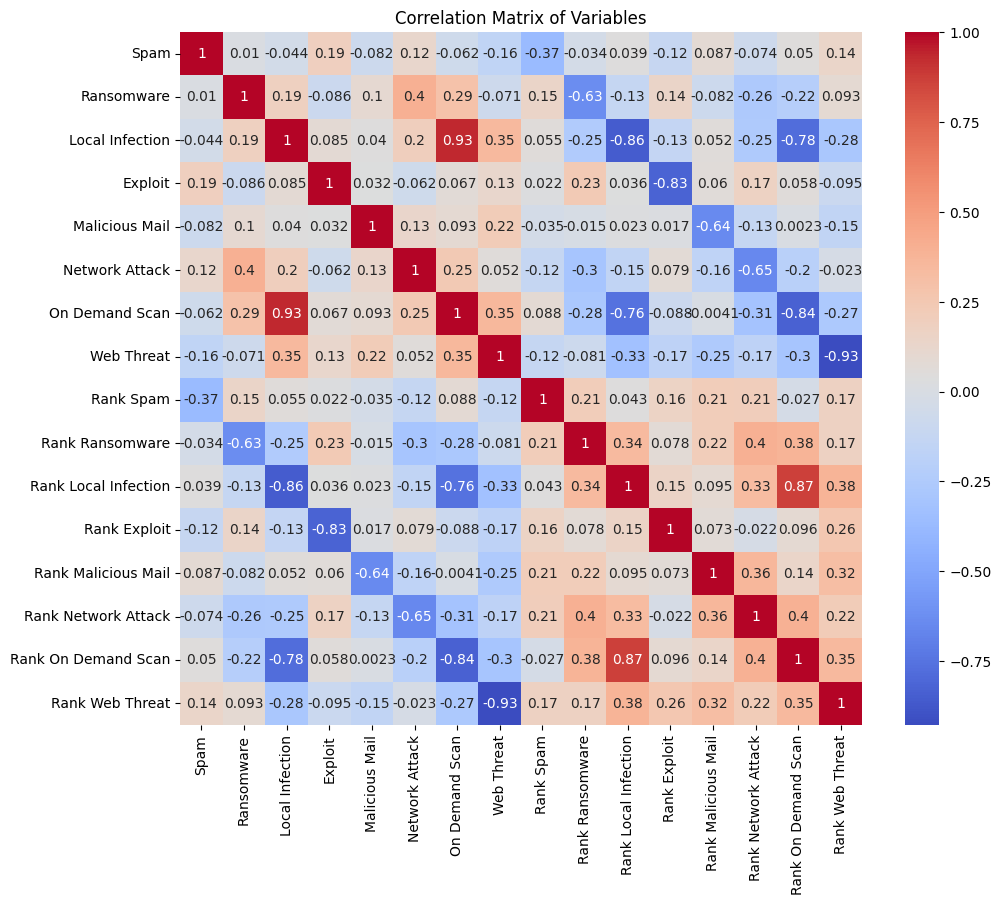

In [25]:
df_corr3 = df.copy()
df_corr3 = df_corr3.drop(['AttackDate', 'Country'], axis = 1)

plt.figure(figsize = (11,9))
sns.heatmap(df_corr3.corr(method = 'pearson'),
            annot = True,
            cmap = 'coolwarm'
            # ,
            # fmt = '.2f'
            )
plt.title('Correlation Matrix of Variables')
plt.show()

### Data Cleaning

In [189]:
#Make a copy of the dataframe for cleaning and to serve as a savepoint
df_cleaned = df.copy()

From the issues found above, these are the things to be done to clean the data:
- Renaming of variables
- Handling of nulls

##### Renaming of variables

In [190]:
"""Column names before cleaning:"""
print(df.columns)
print("-" * 50)

# Fix the names by replacing spaces with underscore
fixed_names = {col: col.replace(' ', '_') for col in df_cleaned.columns}
df_cleaned.rename(columns = fixed_names, inplace = True)

"""Column names after cleaning:"""
print(df_cleaned.columns)

Index(['AttackDate', 'Country', 'Spam', 'Ransomware', 'Local Infection',
       'Exploit', 'Malicious Mail', 'Network Attack', 'On Demand Scan',
       'Web Threat', 'Rank Spam', 'Rank Ransomware', 'Rank Local Infection',
       'Rank Exploit', 'Rank Malicious Mail', 'Rank Network Attack',
       'Rank On Demand Scan', 'Rank Web Threat'],
      dtype='object')
--------------------------------------------------
Index(['AttackDate', 'Country', 'Spam', 'Ransomware', 'Local_Infection',
       'Exploit', 'Malicious_Mail', 'Network_Attack', 'On_Demand_Scan',
       'Web_Threat', 'Rank_Spam', 'Rank_Ransomware', 'Rank_Local_Infection',
       'Rank_Exploit', 'Rank_Malicious_Mail', 'Rank_Network_Attack',
       'Rank_On_Demand_Scan', 'Rank_Web_Threat'],
      dtype='object')


##### Handling of Nulls

In [191]:
"""
Earlier, we found that the columns below have nulls. 
To determine the best approach on how to handle this, we need to: 
- Consider the level of completeness first to see if we can drop all rows where there are nulls.
- Check if we can apply imputation and which type of imputation.
"""

null_list = [
            'Spam',
            'Ransomware',
            'Local_Infection',
            'Exploit',
            'Malicious_Mail',
            'Network_Attack',
            'On_Demand_Scan',
            'Web_Threat',
]
null_list

# Make a copy of the df where only those in null_list exist for ease of use.
df_nulls = df_cleaned[null_list] 

In [192]:
# Check if rows can be fully dropped.
complete_vals = df_cleaned.dropna().shape[0]
count_all = df_cleaned.shape[0]

percentage_complete = complete_vals / float(count_all)
print(f"Count of rows with values on all variables are {complete_vals} out of {count_all}.")
print(f"A percentage difference of {percentage_complete} is observed.")
      

Count of rows with values on all variables are 43804 out of 77623.
A percentage difference of 0.5643172770957061 is observed.


From the results above, we can see that if this method was done, we risk losing the entire dataset. With this, we can conclude that every row has at least one null value thus we can either do the following: 
- Imputation
- Dropping columns that have a high percentage of null values
- Case by case analysis

In [193]:
# Then let's check the central tendencies for each
df_nulls.isnull().mean()*100

Spam              18.86168
Ransomware        32.82403
Local_Infection    4.06323
Exploit           17.21011
Malicious_Mail    10.87178
Network_Attack     7.84690
On_Demand_Scan     4.36984
Web_Threat         4.80657
dtype: float64

Looking at the list above, we have the percentage of nulls to total count per column. We need to re-check the distributions here first to determine which imputation method is best.

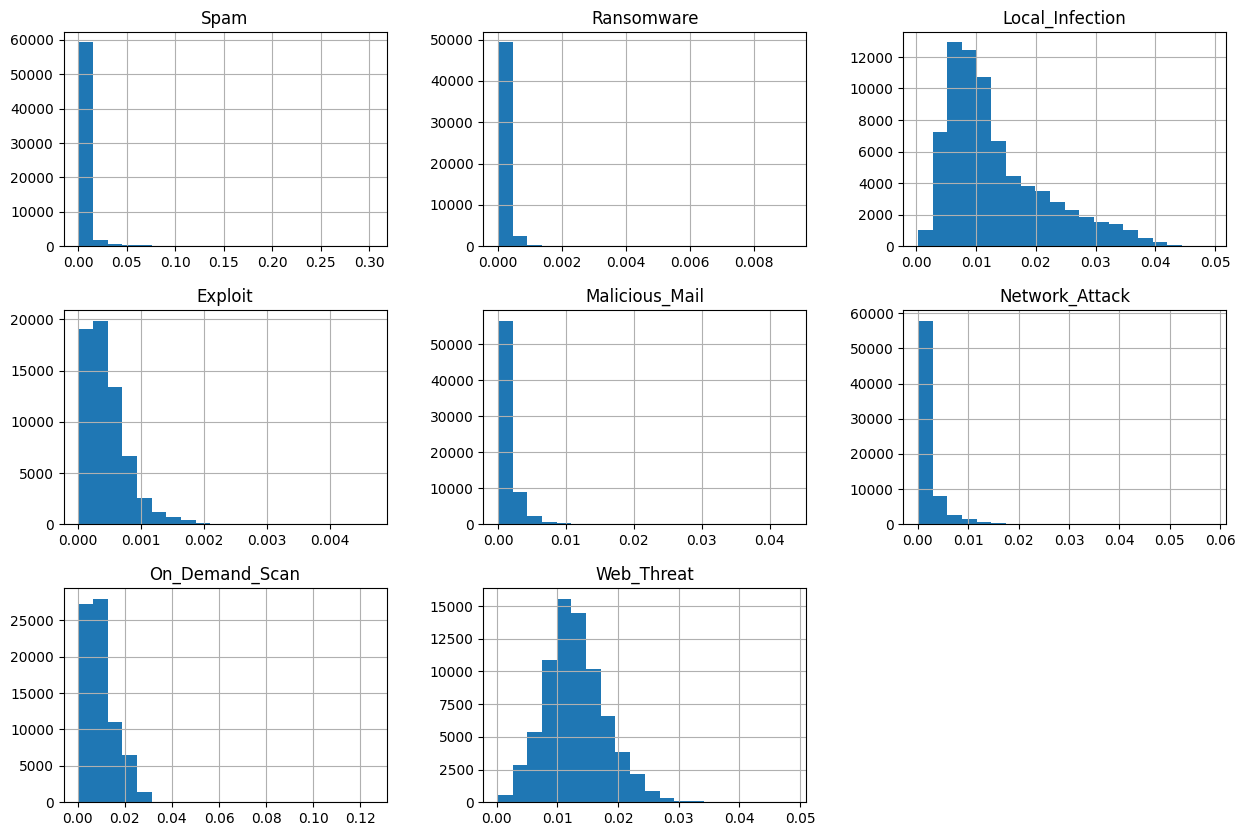

In [194]:
# Check the distributions of all variables first.
df_nulls.hist(bins = 20, figsize = (15, 10))
plt.show()

Looking at the distributions showed above, we can see that all distributions are highly skewed to the right thus using the imputation will be inappropriate here. Median imputation will be used instead.

In [195]:
# Check info prior median imputation.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AttackDate            77623 non-null  object 
 1   Country               77623 non-null  object 
 2   Spam                  62982 non-null  float64
 3   Ransomware            52144 non-null  float64
 4   Local_Infection       74469 non-null  float64
 5   Exploit               64264 non-null  float64
 6   Malicious_Mail        69184 non-null  float64
 7   Network_Attack        71532 non-null  float64
 8   On_Demand_Scan        74231 non-null  float64
 9   Web_Threat            73892 non-null  float64
 10  Rank_Spam             77623 non-null  int64  
 11  Rank_Ransomware       77623 non-null  int64  
 12  Rank_Local_Infection  77623 non-null  int64  
 13  Rank_Exploit          77623 non-null  int64  
 14  Rank_Malicious_Mail   77623 non-null  int64  
 15  Rank_Network_Attack

In [196]:
# Imputing using median
for col in null_list:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AttackDate            77623 non-null  object 
 1   Country               77623 non-null  object 
 2   Spam                  77623 non-null  float64
 3   Ransomware            77623 non-null  float64
 4   Local_Infection       77623 non-null  float64
 5   Exploit               77623 non-null  float64
 6   Malicious_Mail        77623 non-null  float64
 7   Network_Attack        77623 non-null  float64
 8   On_Demand_Scan        77623 non-null  float64
 9   Web_Threat            77623 non-null  float64
 10  Rank_Spam             77623 non-null  int64  
 11  Rank_Ransomware       77623 non-null  int64  
 12  Rank_Local_Infection  77623 non-null  int64  
 13  Rank_Exploit          77623 non-null  int64  
 14  Rank_Malicious_Mail   77623 non-null  int64  
 15  Rank_Network_Attack

In [197]:
# Confirm if there are no nulls anymore.
df_cleaned.isnull().mean()*100

AttackDate             0.00000
Country                0.00000
Spam                   0.00000
Ransomware             0.00000
Local_Infection        0.00000
Exploit                0.00000
Malicious_Mail         0.00000
Network_Attack         0.00000
On_Demand_Scan         0.00000
Web_Threat             0.00000
Rank_Spam              0.00000
Rank_Ransomware        0.00000
Rank_Local_Infection   0.00000
Rank_Exploit           0.00000
Rank_Malicious_Mail    0.00000
Rank_Network_Attack    0.00000
Rank_On_Demand_Scan    0.00000
Rank_Web_Threat        0.00000
dtype: float64

### Feature Engineering

Since the data cleaning has been completed, we'll need to look at the following for feature engineering:
- Encoding of Country
- Date and time features creation: We can use AttackDate here and encode it by year, month, and day to see if there are seasonal patterns or trends on the attacks. We can also try to extract the day of the week and time features to know when the attacks usually happen.
- Interaction Features and Polynomial Features

##### Encoding of Country

In [198]:
# Get the count of columns to be added
data_ohe = df_cleaned.copy()
len(data_ohe['Country'].unique())-1 # k-1

224

In [199]:
# Encode the countries
country_dummies = pd.get_dummies(data_ohe['Country'], drop_first = True)
country_dummies

,Antarctica,Antigua and Barbuda,Arab Republic of Egypt,Argentine Republic,Aruba,Bailiwick of Guernsey,Bailiwick of Jersey,Barbados,Belize,Bermuda,...,Union of the Comoros,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Mexican States,United Republic of Tanzania,United States of America,Vatican City State,Virgin Islands,Virgin Islands of the United States,Åland Islands
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77618,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
77619,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
77620,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
77621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [200]:
# Concatenate and delete 'Country' column
df_cleaned = df_cleaned.reset_index(drop=True)
country_dummies = country_dummies.reset_index(drop=True)
df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)
df_cleaned = df_cleaned.drop('Country', axis=1)
df_cleaned


,AttackDate,Spam,Ransomware,Local_Infection,Exploit,Malicious_Mail,Network_Attack,On_Demand_Scan,Web_Threat,Rank_Spam,...,Union of the Comoros,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Mexican States,United Republic of Tanzania,United States of America,Vatican City State,Virgin Islands,Virgin Islands of the United States,Åland Islands
0,11/10/2022 0:00,0.00090,0.00013,0.01353,0.00013,0.00287,0.01007,0.01148,0.01708,68,...,False,False,False,False,False,False,False,False,False,False
1,11/10/2022 0:00,0.00601,0.00006,0.00575,0.00035,0.00058,0.00095,0.00482,0.00974,27,...,False,False,False,False,False,False,False,False,False,False
2,11/10/2022 0:00,0.00059,0.00007,0.01384,0.00039,0.00092,0.00129,0.00830,0.00554,162,...,False,False,False,False,False,False,False,False,False,False
3,11/10/2022 0:00,0.00059,0.00007,0.00546,0.00273,0.00073,0.00091,0.00546,0.01001,162,...,False,False,False,False,False,False,False,False,False,False
4,11/10/2022 0:00,0.00003,0.00007,0.00774,0.00101,0.00067,0.00129,0.00707,0.01145,138,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77618,11/12/2023 0:00,0.00064,0.00009,0.00901,0.00057,0.00198,0.00149,0.00892,0.01274,86,...,False,True,False,False,False,False,False,False,False,False
77619,11/12/2023 0:00,0.01292,0.00003,0.00428,0.00084,0.00021,0.00045,0.00382,0.01205,12,...,False,False,True,False,False,False,False,False,False,False
77620,11/12/2023 0:00,0.00500,0.00004,0.00870,0.00019,0.00035,0.00106,0.00772,0.00834,34,...,False,False,False,True,False,False,False,False,False,False
77621,11/12/2023 0:00,0.00030,0.00002,0.01201,0.00031,0.00028,0.00091,0.00717,0.01145,101,...,False,False,False,False,True,False,False,False,False,False


##### Date and time features creation

First we need to convert AttackDate to datetime then we will extract the basic temporal features:
- Year
- Month
- Date

Then extract the time-based features:
- Day of week
- Hour
- Time of day

For Time of Day, I'll split it into the following categories and definitions:
- Morning - 5AM to before 12NN
- Afternoon - 12NN to before 5PM
- Evening - 5PM to before 9PM
- Night - 9PM to before 5AM
This segregation allows us to determine when the time of attack were and allows the model to uncover trends in the data.

In [204]:
# Convert AttackDate to datetime format
df_cleaned['AttackDate'] = pd.to_datetime(df_cleaned['AttackDate'], dayfirst = True)

In [ ]:
# Basic temporal features creation
df_cleaned['Year'] = df_cleaned['AttackDate'].dt.year
df_cleaned['Month'] = df_cleaned['AttackDate'].dt.month
df_cleaned['Day'] = df_cleaned['AttackDate'].dt.day

In [211]:
# Time-based features creation

df_cleaned['Day_of_Week'] = df_cleaned['AttackDate'].dt.dayofweek
df_cleaned['Hour'] = df_cleaned['AttackDate'].dt.hour

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
df_cleaned['Time_of_Day'] = df_cleaned['Hour'].apply(get_time_of_day)

In [213]:
for i in ['Year', 'Month', 'Day', 'Day_of_Week', 'Hour', 'Time_of_Day']:
    display(df_cleaned[i].value_counts())
    print('-' *100)

Year
2023    62124
2022    15499
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Month
11    11077
10     9535
12     8159
4      5929
1      5912
5      5729
2      5560
3      5539
7      5533
6      5328
9      4775
8      4547
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Day
7     2789
18    2785
11    2779
10    2779
4     2778
21    2774
28    2769
9     2769
15    2764
16    2752
6     2596
13    2589
20    2585
22    2578
19    2578
8     2577
17    2572
3     2570
27    2568
5     2401
14    2398
12    2389
24    2369
23    2367
2     2366
1     2358
29    2346
25    2175
26    1975
30    1959
31    1569
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Day_of_Week
0    11696
1    11500
4    11298
3    11268
2    11239
5    10496
6    10126
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Hour
0    77623
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


Time_of_Day
Night    77623
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------


We can see that Hour and Time_of_Day has no categories as timestamps don't exist in the data. We should drop these along with the AttackDate column.

In [214]:
df_cleaned = df_cleaned.drop(['AttackDate', 'Hour', 'Time_of_Day'], axis=1)
df_cleaned

,Spam,Ransomware,Local_Infection,Exploit,Malicious_Mail,Network_Attack,On_Demand_Scan,Web_Threat,Rank_Spam,Rank_Ransomware,...,United Republic of Tanzania,United States of America,Vatican City State,Virgin Islands,Virgin Islands of the United States,Åland Islands,Year,Month,Day,Day_of_Week
0,0.00090,0.00013,0.01353,0.00013,0.00287,0.01007,0.01148,0.01708,68,47,...,False,False,False,False,False,False,2022,10,11,1
1,0.00601,0.00006,0.00575,0.00035,0.00058,0.00095,0.00482,0.00974,27,86,...,False,False,False,False,False,False,2022,10,11,1
2,0.00059,0.00007,0.01384,0.00039,0.00092,0.00129,0.00830,0.00554,162,143,...,False,False,False,False,False,False,2022,10,11,1
3,0.00059,0.00007,0.00546,0.00273,0.00073,0.00091,0.00546,0.01001,162,143,...,False,False,False,False,False,False,2022,10,11,1
4,0.00003,0.00007,0.00774,0.00101,0.00067,0.00129,0.00707,0.01145,138,143,...,False,False,False,False,False,False,2022,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77618,0.00064,0.00009,0.00901,0.00057,0.00198,0.00149,0.00892,0.01274,86,37,...,False,False,False,False,False,False,2023,12,11,0
77619,0.01292,0.00003,0.00428,0.00084,0.00021,0.00045,0.00382,0.01205,12,89,...,False,False,False,False,False,False,2023,12,11,0
77620,0.00500,0.00004,0.00870,0.00019,0.00035,0.00106,0.00772,0.00834,34,77,...,False,False,False,False,False,False,2023,12,11,0
77621,0.00030,0.00002,0.01201,0.00031,0.00028,0.00091,0.00717,0.01145,101,116,...,True,False,False,False,False,False,2023,12,11,0


##### Interaction Features and Polynomial Features

### Model Building and Training

### Evaluation and Iteration